# Name of the Student: Aagam Manish Shah
# USC ID Number: 8791018480

# 1. Vertebral Column Data Set

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0 and AB=1.

In [2]:
## Features ##

# PI = Pelvic Incidence
# PT = Pelvic Tilt
# LLA = Lumbar Lordosis Angle
# SS = Sacral Slope
# PR = Pelvic Radius
# GS = Grade of Spondylolisthesis

## Labels ##

# AB = Abnormal
# NO = Normal

## (a) Download the Vertebral Column Data Set

In [3]:
pd.read_csv('column_2C.dat', delimiter=' ',names = ["PI","PT","LLA","SS","PR","GS","Labels"])

,PI,PT,LLA,SS,PR,GS,Labels
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [4]:
# To determine the Independent and the Dependent variables 

df = pd.read_csv('column_2C.dat', delimiter=' ',names = ["PI","PT","LLA","SS","PR","GS","Labels"])
array = df.to_numpy()
Independent_variables = array[:,:-1]
# print(Independent_variables)
Dependent_variables = array[:,-1]
# print(Dependent_variables)

## (b) Pre-Processing and Exploratory data analysis:

### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

##### Class 0 - Normal - Red
##### Class 1 - Abnormal - Blue

<function matplotlib.pyplot.show(*args, **kw)>

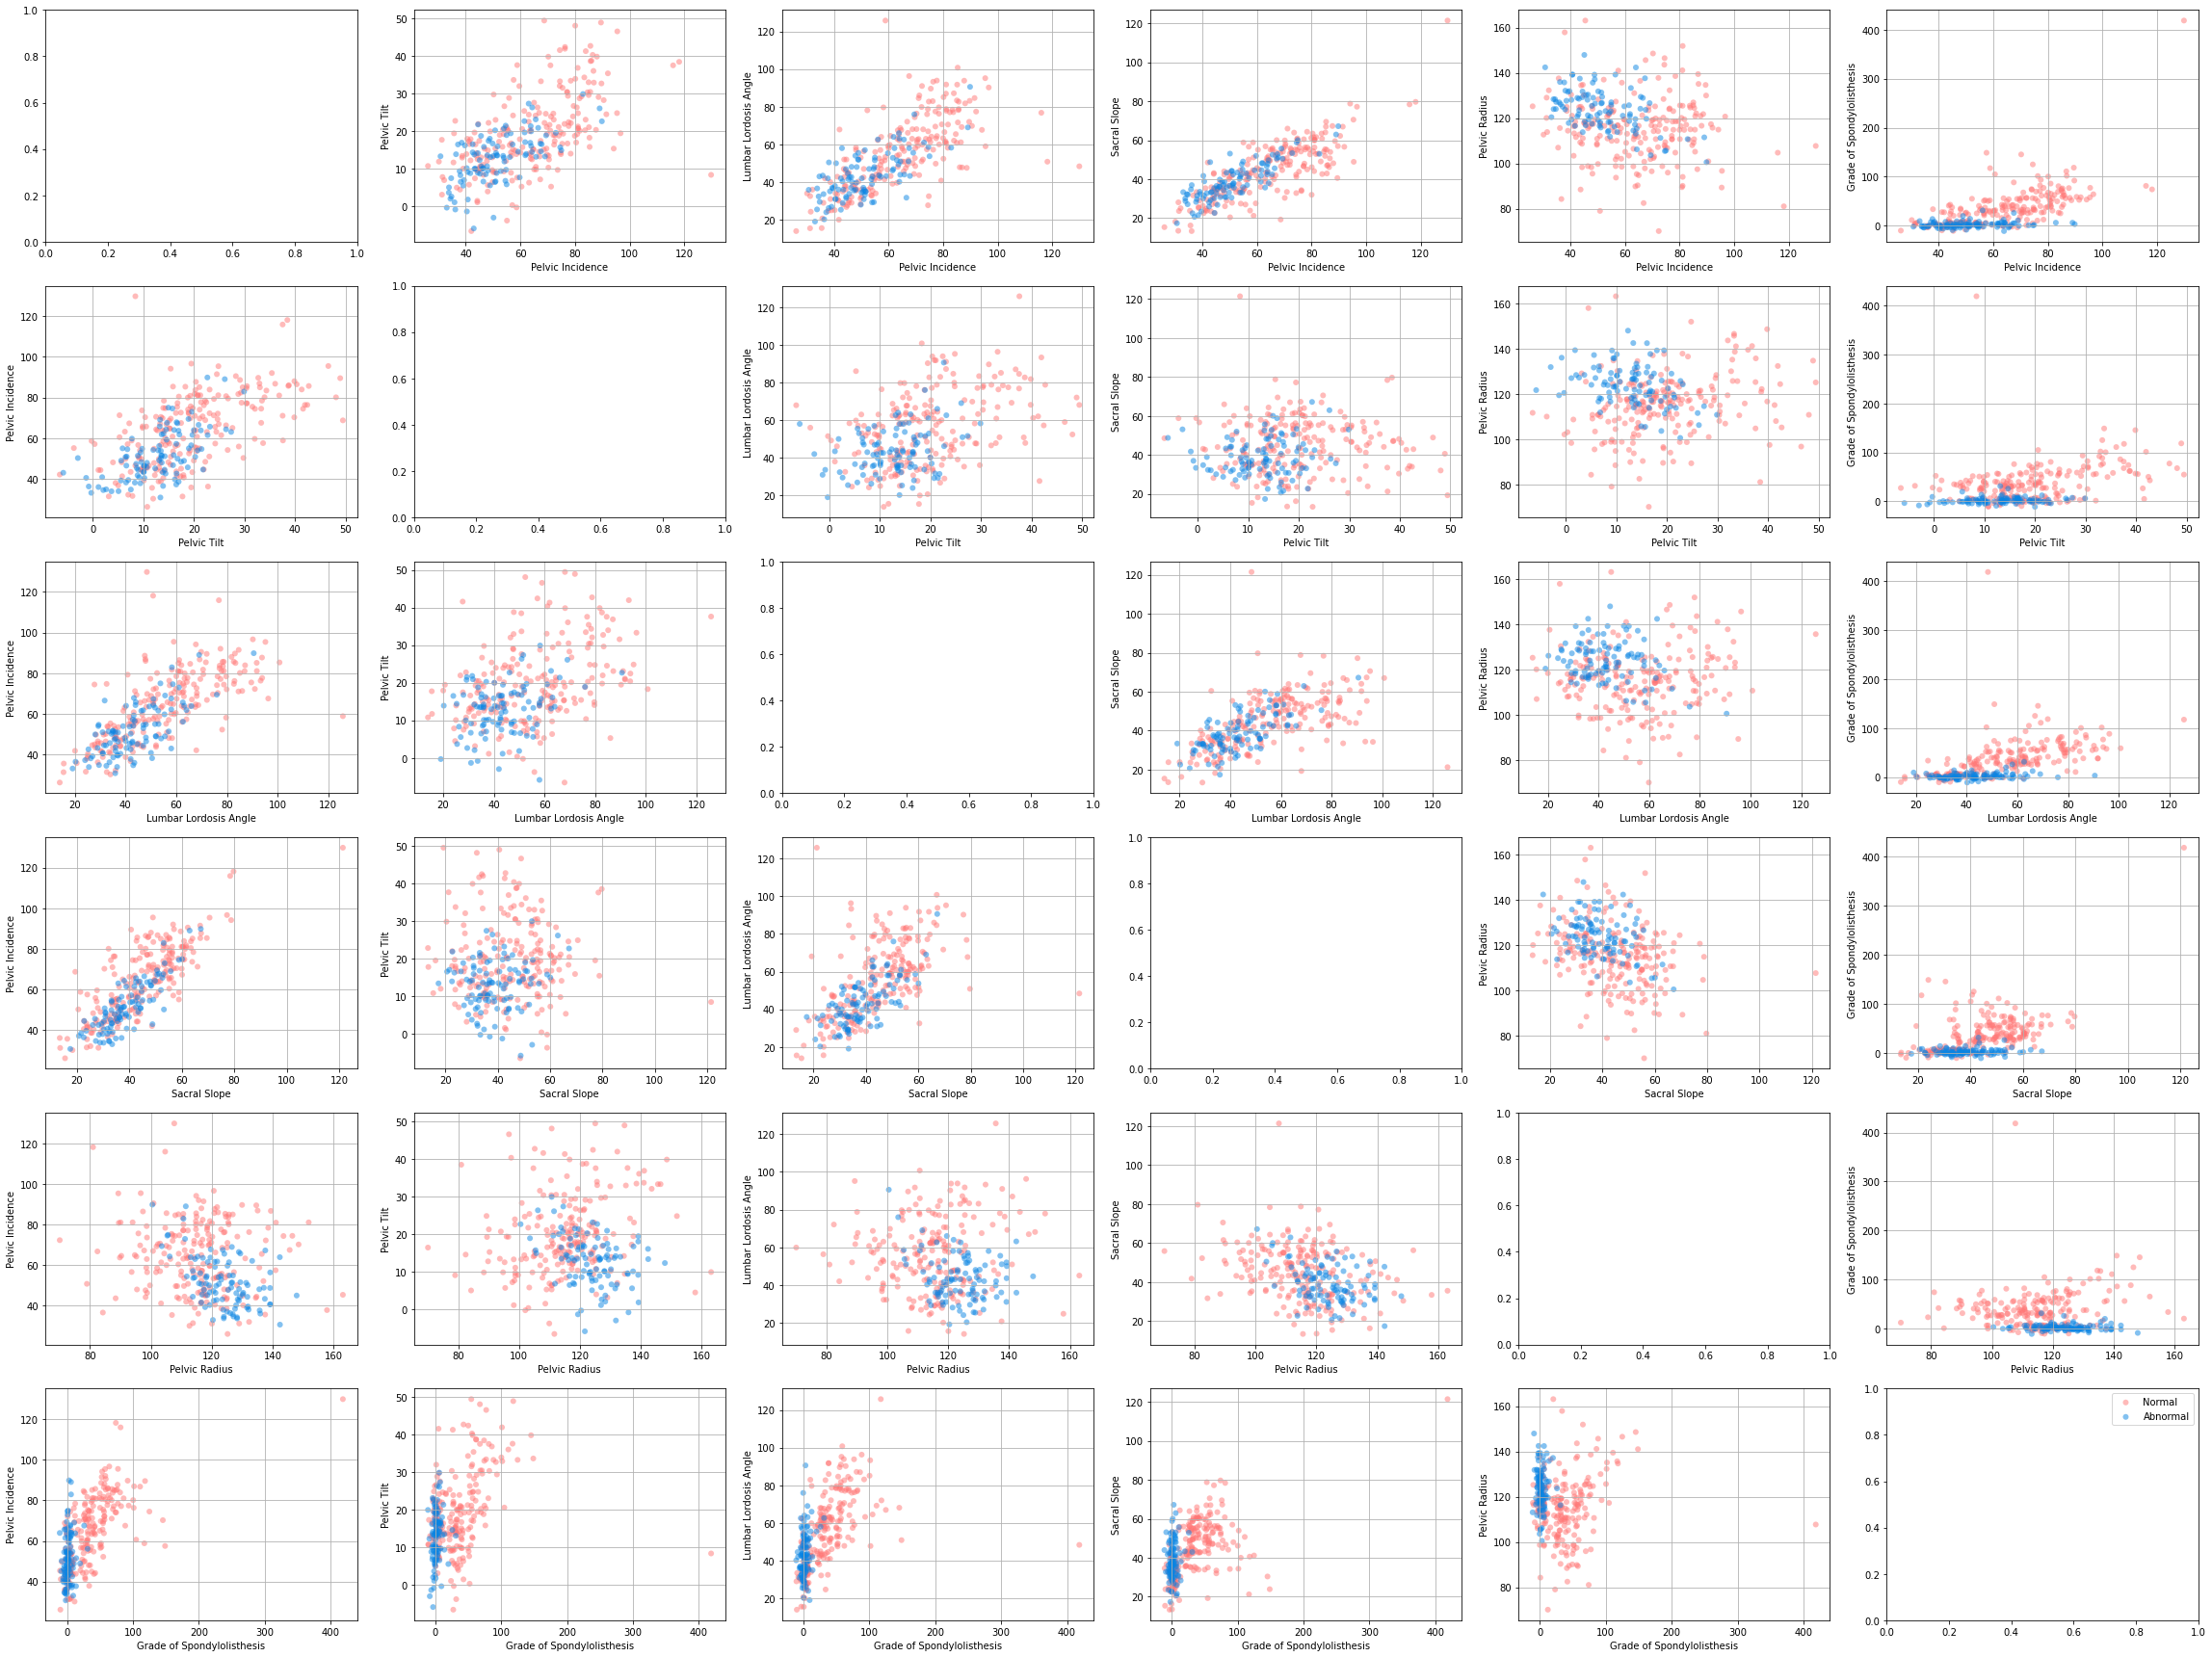

In [5]:
input_list = ['Pelvic Incidence','Pelvic Tilt','Lumbar Lordosis Angle','Sacral Slope','Pelvic Radius',
              'Grade of Spondylolisthesis']

# Generating ScatterPLots
fig, ax = plt.subplots(nrows = 6, ncols = 6, figsize=(32,24))
for i in range(0,6):
    for j in range(0,6):
        if i != j:
            N = ax[i,j].scatter(df. iloc[:209, i], df. iloc[:209, j], color='#ff7675', alpha=0.5, edgecolors='none')
            AB = ax[i,j].scatter(df. iloc[210:, i], df. iloc[210:, j], color='#0984e3', alpha=0.5, edgecolors='none')
            ax[i,j].set_xlabel(input_list[i])
            ax[i,j].set_ylabel(input_list[j])
            ax[i,j].grid(True)
        j += 1
    i += 1
    
plt.legend([N,AB],['Normal','Abnormal'])    
fig.tight_layout()
plt.show

### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

##### Class 0 - Normal - Yellow
##### Class 1 - Abnormal - Blue

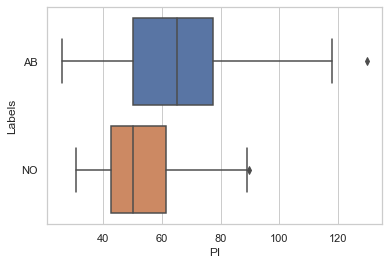

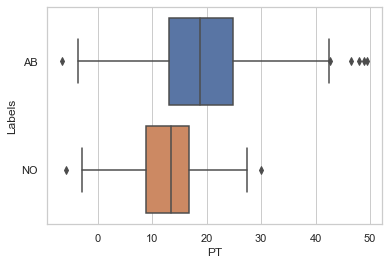

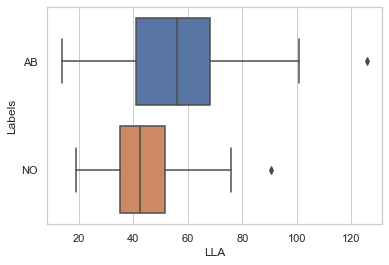

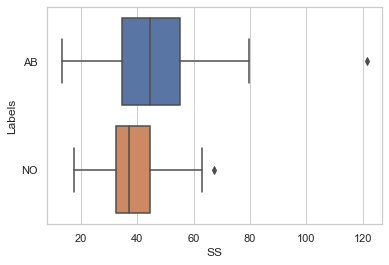

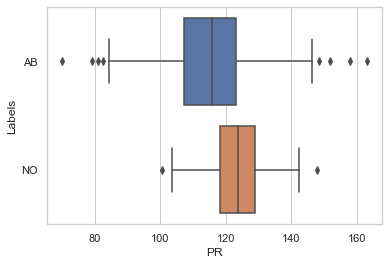

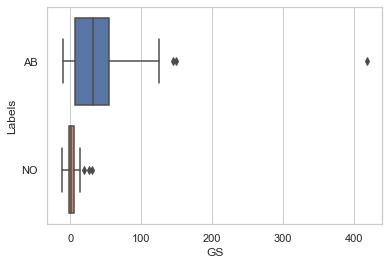

In [6]:
sns.set(style="whitegrid")
for index in range(0,6):
    ax = sns.boxplot(x = df[df.columns[index]], y = df[df.columns[6]])
    plt.show()

### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [7]:
df = pd.read_csv('column_2C.dat', delimiter=' ',names = ["PI","PT","LLA","SS","PR","GS","Labels"])
df = df.replace(['NO','AB'],[0,1])

Class_0 = df[df. iloc[:, 6]==0]
# print(Class_0)
Class_1 = df[df. iloc[:, 6]==1]
# print(Class_1)

first_70_rows_Class_0 = Class_0[:70]
# print(first_70_rows_Class_0)
first_140_rows_Class_1 = Class_1[:140]
# print(first_140_rows_Class_1)

rest_rows_Class_0 = Class_0[70:]
# print(rest_rows_Class_0)
rest_rows_Class_1 = Class_1[140:]
# print(rest_rows_Class_1)

training_data = pd.concat((first_70_rows_Class_0,first_140_rows_Class_1))
# print(training_data)
testing_data = pd.concat((rest_rows_Class_0,rest_rows_Class_1))
# print(testing_data)

#### Split into X_Train, X_test, Y_train, Y_test

In [8]:
# To get the Training Data, Training Labels, Testing Data and Testing Labels

X_train = training_data.drop(['Labels'],axis = 1)
Y_train = training_data['Labels'].values

X_test = testing_data.drop(['Labels'],axis = 1)
Y_test = testing_data['Labels'].values

## (c) Classification using KNN on Vertebral Column Data Set

### i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [9]:
# KNN Classifier

k_nn=KNeighborsClassifier()

k_nn.n_neighbors=4 
k_nn.fit(X_train,Y_train)
train_score=k_nn.score(X_train,Y_train)
train_error = 1-train_score
# Version 1
y_pred = k_nn.predict(X_test)
test_score=accuracy_score(Y_test,y_pred)
# Version 2
# test_score=k_nn.score(X_test,Y_test)
test_error = 1-test_score
print("The training accuracy is: {}".format(train_score))
print("The training error is: {}".format(train_error))
print("The testing accuracy is: {}".format(test_score))
print("The testing error is: {}".format(test_error))

The training accuracy is: 0.8571428571428571
The training error is: 0.1428571428571429
The testing accuracy is: 0.94
The testing error is: 0.06000000000000005


### ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k E {208, 205, . . . . ,7, 4, 1} (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F-score when k = k*.

In [10]:
# KNN Classifier for different k values

k_nn=KNeighborsClassifier()

k_values=[]
train_scores=[]
train_errors=[]
test_scores=[]
test_errors=[]

for k in range (208,0,-3):
    k_nn.n_neighbors=k 
    k_nn.fit(X_train,Y_train)
    train_score=k_nn.score(X_train,Y_train)
    train_error = 1-train_score
    y_pred = k_nn.predict(X_test)
    test_score=accuracy_score(Y_test,y_pred)
    test_error = 1-test_score
    train_scores.append(train_score)
    train_errors.append(train_error)
    test_scores.append(test_score)
    test_errors.append(test_error)
    k_values.append(k)

print("Best training error: {}".format(np.amin(train_errors)))
print("Best testing accuracy: {}".format(np.amax(test_scores)))
print("Best testing error: {}".format(np.amin(test_errors)))
k_star = k_values[np.where(np.array(test_errors) == np.amin(np.array(test_errors)))[0][0]]
print("Best k*value: {}".format(k_star))

Best training error: 0.0
Best testing accuracy: 0.94
Best testing error: 0.06000000000000005
Best k*value: 4


Text(0.5, 1.0, 'Performace Under Varying K Values')

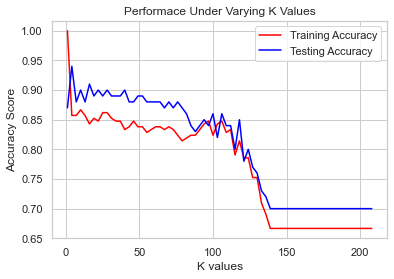

In [11]:
plt.plot(k_values,train_scores, color='red',label='Training Accuracy')
plt.plot(k_values,test_scores, color='blue',label='Testing Accuracy')
plt.legend(loc='upper right')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.title('Performace Under Varying K Values') 

Text(0.5, 1.0, 'Performace Under Varying K Values')

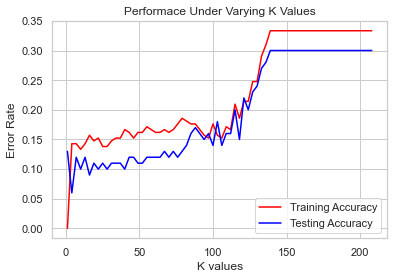

In [12]:
plt.plot(k_values,train_errors, color='red',label='Training Accuracy')
plt.plot(k_values,test_errors, color='blue',label='Testing Accuracy')
plt.legend(loc='lower right')
plt.xlabel('K values')
plt.ylabel('Error Rate')
plt.title('Performace Under Varying K Values')

In [13]:
# To calculate the confusion matrix, true positive rate, true negative rate, precision, recall and F-score

k_nn=KNeighborsClassifier()

k_nn.n_neighbors=4 
k_nn.fit(X_train,Y_train)
train_score=k_nn.score(X_train,Y_train)
train_error = 1-train_score
# Version 1
y_pred = k_nn.predict(X_test)
test_score=accuracy_score(Y_test,y_pred)
# Version 2
# test_score=k_nn.score(X_test,Y_test)
test_error = 1-test_score

y_pred = k_nn.predict(X_test)
CM = confusion_matrix(Y_test,y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
F_score = f1_score(Y_test,y_pred)
print("The Confusion Matrix is: {}".format(CM))
print("The true positive rate is: {}".format(TPR))
print("The true negative rate is: {}".format(TNR))
print("The precision value is: {}".format(precision))
print("The recall value is: {}".format(recall))
print("The F-score is: {}".format(F_score))

The Confusion Matrix is: [[25  5]
 [ 1 69]]
The true positive rate is: 0.9857142857142858
The true negative rate is: 0.8333333333333334
The precision value is: 0.9324324324324325
The recall value is: 0.9857142857142858
The F-score is: 0.9583333333333333


### iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N E {10, 20, 30, . . . . ,210}. Note: for each N, select your training set by choosing the first [N/3] rows of Class 0 and the first N - [N/3] rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}. This plot is called a Learning Curve.

In [14]:
df = pd.read_csv('column_2C.dat', delimiter=' ',names = ["PI","PT","LLA","SS","PR","GS","Labels"])
df = df.replace(['NO','AB'],[0,1])

Class_0 = df[df. iloc[:, 6]==0]
# print(Class_0)
Class_1 = df[df. iloc[:, 6]==1]
# print(Class_1)

list_N = []
best_test_error_rate = []

for N in range (10,220,10):
    first_N_rows_Class_0 = Class_0[:int(N/3)]
    # print(first_N_rows_Class_0)
    first_N_3_rows_Class_1 = Class_1[:int(N-(N/3))]
    # print(first_N_3_rows_Class_1)
    rest_rows_Class_0 = Class_0[int(N/3):]
    # print(rest_rows_Class_0)
    rest_rows_Class_1 = Class_1[int(N-(N/3)):]
    # print(rest_rows_Class_1)
    training_data = pd.concat((first_N_rows_Class_0,first_N_3_rows_Class_1))
    # print(training_data)
    testing_data = pd.concat((rest_rows_Class_0,rest_rows_Class_1))
    # print(testing_data)
    X_train = training_data.drop(['Labels'],axis = 1)
    Y_train = training_data['Labels'].values
    X_test = testing_data.drop(['Labels'],axis = 1)
    Y_test = testing_data['Labels'].values
    
    k_nn=KNeighborsClassifier()
    
    k_values=[]
    train_scores=[]
    train_errors=[]
    test_scores=[]
    test_errors=[]
    
    for k in range (1,N,5):
        k_nn.n_neighbors=k 
        k_nn.fit(X_train,Y_train)
        train_score=k_nn.score(X_train,Y_train)
        train_error = 1-train_score
        y_pred = k_nn.predict(X_test)
        test_score=accuracy_score(Y_test,y_pred)
        test_error = 1-test_score
        train_scores.append(train_score)
        train_errors.append(train_error)
        test_scores.append(test_score)
        test_errors.append(test_error)
        k_values.append(k)
    list_N.append(N)
    best_test_error_rate.append(np.amin(np.array(test_errors)))

Text(0.5, 1.0, 'Performace Under Varying K Values: Learning Curve')

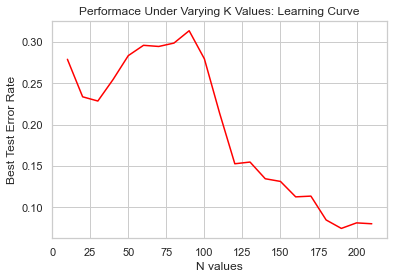

In [15]:
plt.plot(list_N,best_test_error_rate, color='red')
plt.xlabel('N values')
plt.ylabel('Best Test Error Rate')
plt.title('Performace Under Varying K Values: Learning Curve') 

## (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k*) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}.

### i. Minkowski Distance:

In [16]:
df = pd.read_csv('column_2C.dat', delimiter=' ',names = ["PI","PT","LLA","SS","PR","GS","Labels"])
df = df.replace(['NO','AB'],[0,1])

Class_0 = df[df. iloc[:, 6]==0]
# print(Class_0)
Class_1 = df[df. iloc[:, 6]==1]
# print(Class_1)

first_70_rows_Class_0 = Class_0[:70]
# print(first_70_rows_Class_0)
first_140_rows_Class_1 = Class_1[:140]
# print(first_140_rows_Class_1)

rest_rows_Class_0 = Class_0[70:]
# print(rest_rows_Class_0)
rest_rows_Class_1 = Class_1[140:]
# print(rest_rows_Class_1)

training_data = pd.concat((first_70_rows_Class_0,first_140_rows_Class_1))
# print(training_data)
testing_data = pd.concat((rest_rows_Class_0,rest_rows_Class_1))
# print(testing_data)

X_train = training_data.drop(['Labels'],axis = 1)
Y_train = training_data['Labels'].values

X_test = testing_data.drop(['Labels'],axis = 1)
Y_test = testing_data['Labels'].values

#### A. which becomes Manhattan Distance with p = 1.

In [17]:
# KNN Classifier with Minkowski distance
# A. Manhattan distance 

k_nn=KNeighborsClassifier()

k_values=[]
train_scores=[]
train_errors=[]
test_scores=[]
test_errors=[]

for k in range (1,197,5):
    k_nn.n_neighbors=k 
    k_nn.p = 1
    k_nn.fit(X_train,Y_train)
    train_score=k_nn.score(X_train,Y_train)
    train_error = 1-train_score
    y_pred = k_nn.predict(X_test)
    test_score=accuracy_score(Y_test,y_pred)
    test_error = 1-test_score
    train_scores.append(train_score)
    train_errors.append(train_error)
    test_scores.append(test_score)
    test_errors.append(test_error)
    k_values.append(k)

print("Best training error: {}".format(np.amin(train_errors)))
print("Best testing accuracy: {}".format(np.amax(test_scores)))
print("Best testing error: {}".format(np.amin(test_errors)))
k_star = k_values[np.where(np.array(test_errors) == np.amin(np.array(test_errors)))[0][0]]
print("Best k* value for Manhattan Distance: {}".format(k_star))

Best training error: 0.0
Best testing accuracy: 0.89
Best testing error: 0.10999999999999999
Best k* value for Manhattan Distance: 6


#### B. with log10(p) E {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k* you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [18]:
# B. with log_p

k_nn=KNeighborsClassifier()

p_values=[]
train_scores=[]
train_errors=[]
test_scores=[]
test_errors=[]

for p_dash in np.arange(0.1,1.1,0.1):
    k_nn.n_neighbors=6
    k_nn.p = 10**p_dash
    k_nn.fit(X_train,Y_train)
    train_score=k_nn.score(X_train,Y_train)
    train_error = 1-train_score
    y_pred = k_nn.predict(X_test)
    test_score=accuracy_score(Y_test,y_pred)
    test_error = 1-test_score
    train_scores.append(train_score)
    train_errors.append(train_error)
    test_scores.append(test_score)
    test_errors.append(test_error)
    p_values.append(p_dash)
  
print("Best training error: {}".format(np.amin(train_errors)))
print("Best testing accuracy: {}".format(np.amax(test_scores)))
print("Best testing error: {}".format(np.amin(test_errors)))
p_best_value = p_values[np.where(np.array(test_errors) == np.amin(np.array(test_errors)))[0][0]]
print("Best p value : {}".format(p_best_value))
print("The best log_p value is: {}".format(10**p_best_value))

Best training error: 0.1333333333333333
Best testing accuracy: 0.94
Best testing error: 0.06000000000000005
Best p value : 0.6
The best log_p value is: 3.9810717055349722


#### C. which becomes Chebyshev Distance with p tending to infinity.

In [19]:
# C. Chebyshev distance 

k_nn=KNeighborsClassifier()

k_values=[]
train_scores=[]
train_errors=[]
test_scores=[]
test_errors=[]

for k in range (1,197,5):
    k_nn.n_neighbors=k 
    k_nn.p = float('inf')
    k_nn.fit(X_train,Y_train)
    train_score=k_nn.score(X_train,Y_train)
    train_error = 1-train_score
    y_pred = k_nn.predict(X_test)
    test_score=accuracy_score(Y_test,y_pred)
    test_error = 1-test_score
    train_scores.append(train_score)
    train_errors.append(train_error)
    test_scores.append(test_score)
    test_errors.append(test_error)
    k_values.append(k)

print("Best training error: {}".format(np.amin(train_errors)))
print("Best testing accuracy: {}".format(np.amax(test_scores)))
print("Best testing error: {}".format(np.amin(test_errors)))
k_star = k_values[np.where(np.array(test_errors) == np.amin(np.array(test_errors)))[0][0]]
print("Best k* value for Chebyshev Distance: {}".format(k_star))

Best training error: 0.0
Best testing accuracy: 0.92
Best testing error: 0.07999999999999996
Best k* value for Chebyshev Distance: 16


### ii. Mahalanobis Distance.

In [20]:
# Mahalanobis distance

k_nn=KNeighborsClassifier()

k_values=[]
train_scores=[]
train_errors=[]
test_scores=[]
test_errors=[]
covTrain = np.cov(X_train, rowvar = False)

for k in range (1,197,5):
    k_nn.n_neighbors=k 
    k_nn.metric='mahalanobis'
    k_nn.metric_params = {'VI': covTrain}
    k_nn.fit(X_train,Y_train)
    train_score=k_nn.score(X_train,Y_train)
    train_error = 1-train_score
    y_pred = k_nn.predict(X_test)
    test_score=accuracy_score(Y_test,y_pred)
    test_error = 1-test_score
    train_scores.append(train_score)
    train_errors.append(train_error)
    test_scores.append(test_score)
    test_errors.append(test_error)
    k_values.append(k)

print("Best training error: {}".format(np.amin(train_errors)))
print("Best testing accuracy: {}".format(np.amax(test_scores)))
print("Best testing error: {}".format(np.amin(test_errors)))
k_star = k_values[np.where(np.array(test_errors) == np.amin(np.array(test_errors)))[0][0]]
print("Best k* value for Mahalanobis Distance: {}".format(k_star))

Best training error: 0.0
Best testing accuracy: 0.92
Best testing error: 0.07999999999999996
Best k* value for Mahalanobis Distance: 6


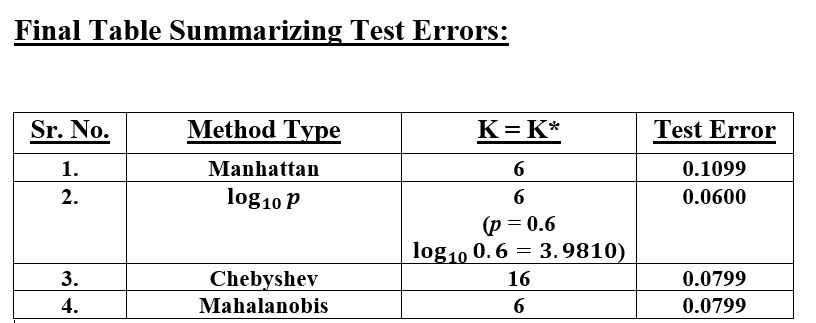

## (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k E {1, 6, 11, 16, . . . , 196}.

In [21]:
## KNN classifier using weighted voting

# Euclidean distance 

k_nn=KNeighborsClassifier()

k_values=[]
train_scores=[]
train_errors=[]
test_scores=[]
test_errors=[]

for k in range (1,197,5):
    k_nn.n_neighbors=k 
    k_nn.p = 2
    k_nn.weights='distance'
    k_nn.fit(X_train,Y_train)
    train_score=k_nn.score(X_train,Y_train)
    train_error = 1-train_score
    y_pred = k_nn.predict(X_test)
    test_score=accuracy_score(Y_test,y_pred)
    test_error = 1-test_score
    train_scores.append(train_score)
    train_errors.append(train_error)
    test_scores.append(test_score)
    test_errors.append(test_error)
    k_values.append(k)

print("Best training error: {}".format(np.amin(train_errors)))
print("Best testing accuracy: {}".format(np.amax(test_scores)))
print("Best testing error: {}".format(np.amin(test_errors)))
k_star = k_values[np.where(np.array(test_errors) == np.amin(np.array(test_errors)))[0][0]]
print("Best k* value for Euclidean Distance: {}".format(k_star))

Best training error: 0.0
Best testing accuracy: 0.9
Best testing error: 0.09999999999999998
Best k* value for Euclidean Distance: 6


In [22]:
# Manhattan distance 

k_nn=KNeighborsClassifier()

k_values=[]
train_scores=[]
train_errors=[]
test_scores=[]
test_errors=[]

for k in range (1,197,5):
    k_nn.n_neighbors=k 
    k_nn.p = 1
    k_nn.weights='distance'
    k_nn.fit(X_train,Y_train)
    train_score=k_nn.score(X_train,Y_train)
    train_error = 1-train_score
    y_pred = k_nn.predict(X_test)
    test_score=accuracy_score(Y_test,y_pred)
    test_error = 1-test_score
    train_scores.append(train_score)
    train_errors.append(train_error)
    test_scores.append(test_score)
    test_errors.append(test_error)
    k_values.append(k)

print("Best training error: {}".format(np.amin(train_errors)))
print("Best testing accuracy: {}".format(np.amax(test_scores)))
print("Best testing error: {}".format(np.amin(test_errors)))
k_star = k_values[np.where(np.array(test_errors) == np.amin(np.array(test_errors)))[0][0]]
print("Best k* value for Manhattan Distance: {}".format(k_star))

Best training error: 0.0
Best testing accuracy: 0.9
Best testing error: 0.09999999999999998
Best k* value for Manhattan Distance: 26


In [23]:
# Chebyshev distance 

k_nn=KNeighborsClassifier()

k_values=[]
train_scores=[]
train_errors=[]
test_scores=[]
test_errors=[]

for k in range (1,197,5):
    k_nn.n_neighbors=k 
    k_nn.p = float('inf')
    k_nn.weights='distance'
    k_nn.fit(X_train,Y_train)
    train_score=k_nn.score(X_train,Y_train)
    train_error = 1-train_score
    y_pred = k_nn.predict(X_test)
    test_score=accuracy_score(Y_test,y_pred)
    test_error = 1-test_score
    train_scores.append(train_score)
    train_errors.append(train_error)
    test_scores.append(test_score)
    test_errors.append(test_error)
    k_values.append(k)

print("Best training error: {}".format(np.amin(train_errors)))
print("Best testing accuracy: {}".format(np.amax(test_scores)))
print("Best testing error: {}".format(np.amin(test_errors)))
k_star = k_values[np.where(np.array(test_errors) == np.amin(np.array(test_errors)))[0][0]]
print("Best k* value for Chebyshev Distance: {}".format(k_star))

Best training error: 0.0
Best testing accuracy: 0.89
Best testing error: 0.10999999999999999
Best k* value for Chebyshev Distance: 16


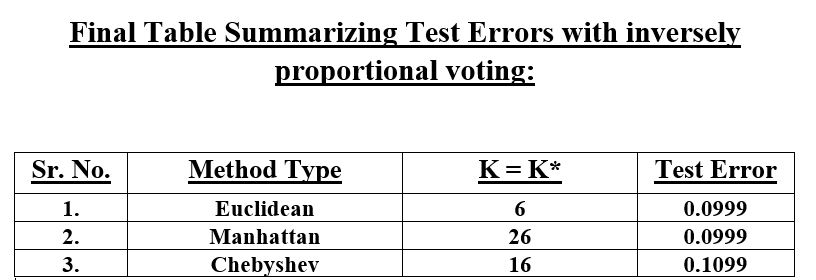

## (f) What is the lowest training error rate you achieved in this homework?

The lowest training error rate I achieved in this homework is 0.